# HIV Model Final Draft

Katie Foster

10/24/2018

In [37]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [74]:
%%html
<marquee style='width: 100%; color: black;'><b>
Hello World
</b></marquee>

### Make System Function

In [39]:
def make_system(Γ, μ, τ, β, ρ, α, σ, δ, π):
     
    """Make a system object for the SIR model.
    returns: System object
    """
    init = State(R=200, L=0, E=0, V=4e-7)
    step = 18 #number of steps per day OR 80 minute steps
    t0 = 0
    t_end = 120 * step

    return System(init=init, t0=t0, t_end=t_end,
                  Γ=Γ/step,
                  μ=μ/step,
                  τ=τ,
                  β=β/step,
                  ρ=ρ,
                  α=α/step,
                  σ=σ/step,
                  δ=δ/step,
                  π=π/step)


### Plot Results

In [58]:
def plot_results(R, L, E, V):
    """Plot the results of a RLEV model.
    """
    plot(R, '--', label='Uninfected')
    plot(L, '-', label='Latently Infected')
    plot(E, ':', label='Actively Infected')
    plot(V, ':', label='Free Virons')
    decorate(xlabel='Time (80 minute periods)',
             ylabel='Number of parts in sample')

### Update Function

In [41]:
def update_func(state, t, system):
    r, l, e, v = state
    unpack(system)
    #functions from paper
    Δr = Γ*τ - μ*r - β*r*v
    Δl = ρ*β*r*v - μ*l - α*l
    Δe = (1-ρ) * (β*r*v) + α*l - δ*e
    Δv = π*e - σ*v
    
    r += Δr
    l += Δl
    e += Δe
    v += Δv
    
    return State(R=r, L=l, E=e, V=v)


### Run Simulation Function 

In [60]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [64]:
system = make_system(1.36, 1.36e-3, 0.2, 0.00027, 0.1, 0.036, 2, 0.33, 100)
results = run_simulation(system, update_func)
print('')

## Graph of all variables
As you can see, when all the variables are plotted on the same axes, the results are difficult to decipher because the scales of the numbers for the different variables are so different from each other. Therefore it is neccesary to plot the different variables on different axes.

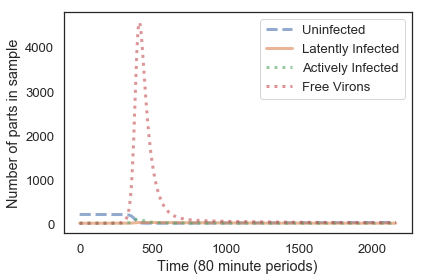

In [62]:
plot_results(results.R, results.L, results.E, results.V)

## Graph of R (uninfected lympocytes)

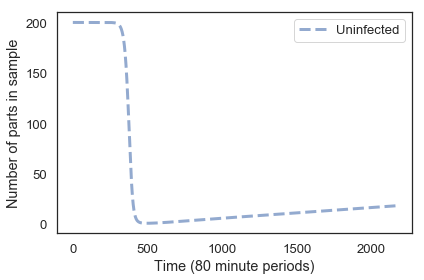

In [68]:
plot(results.R, '--', label='Uninfected')
decorate(xlabel='Time (80 minute periods)',
        ylabel='Number of parts in sample')

### Graph of L (latently) and E (actively) infected cells

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


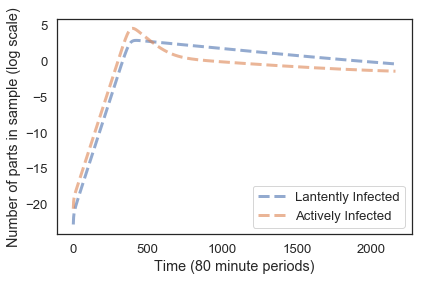

In [69]:
plot(log(results.L), '--', label='Lantently Infected')
plot(log(results.E), '--', label='Actively Infected')

decorate(xlabel='Time (80 minute periods)',
        ylabel='Number of parts in sample (log scale)')
#decorate(ybound=(-20,10))

## Graph of Free Virons (V)

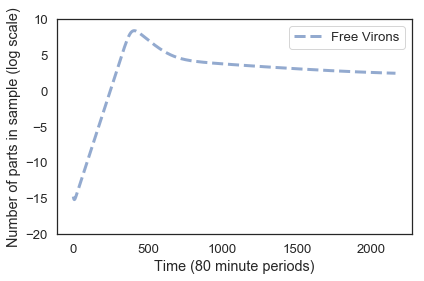

In [72]:
plot(log(results.V), '--', label='Free Virons')

decorate(xlabel='Time (80 minute periods)',
        ylabel='Number of parts in sample (log scale)')

decorate(ybound=(-20,10))